In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz as gr
import random as rd
import pickle

from sklearn.preprocessing import StandardScaler

import jax.numpy as jnp
import jax.random as random
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive

/home/thebscotte/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Abstract

Dynamic pricing has been the dominant approach in airline revenue management systems for decades. This method has continually improved with advances in new algorithms and better computing power. However, even with these improvements, the general pricing system remained rooted in price discrimination principles. Recently, Large Language Models (LLMs) have opened new avenues for many technologies. Their underlying structures and capabilities provide an opportunity for a new pricing paradigm to enter the airline industry: **fully personalized pricing**. In this post, we review the history and current approaches to airline pricing systems, from economic theory to the algorithms generally utilized. We then present information on **Large Market Models (LMMs)**, the new approach companies are leveraging to provide completely personalized prices to airline consumers. We conclude with a basic prototype of personalized pricing using a dynamic hierarchical Bayesian mixed logit model.

# Introduction

In the early history of commercial aviation, airlines were governed by the **Civil Aeronautics Board (CAB)**. The CAB not only set prices and established routes but also oversaw various other operational aspects for these airlines. However, this changed dramatically in 1978 with airline deregulation [@AirlineDeregulationAct]. From that point onward, airlines gained the autonomy to determine their own pricing strategies, establish their own routes, and offer distinct services to differentiate themselves within the industry.

This new freedom, however, brought the challenge of achieving profitability at each airline. The airline business operates within a high fixed cost, low marginal cost industry. A significant portion of airline expenses is incurred through the acquisition and maintenance of aircraft, personnel, fuel, and other operational overhead. In contrast, the marginal cost of accommodating an additional passenger on a given flight is relatively low. Thus, achieving full or near-full flights—became the primary driver of airline profitability.

Like all businesses, airlines sought to move beyond simply selling available seats. They wanted to maximize total revenue (and thus profit) from each flight. To achieve this, airlines recognized the critical need to accurately estimate a consumer's **willingness to pay (WTP)** [@Marshall1890Principles]. Consequently, a sole focus on cost-based pricing was insufficient. Instead, a transition to **market-based pricing** [@Cross1997Revenue] became imperative.

## First Methods: Yield Management

This market-based pricing approach became known as **yield management** (a term coined by Robert Cross at American Airlines). Yield management constituted a systematic approach focused on identifying distinct customer segments, setting different prices for these segments, and updating these prices regularly. Essentially, yield management aims to estimate a consumer's WTP and set prices that capture as much of that value as possible.

Airlines recognized that each customer had a unique WTP, but given the computational limitations of the time, calculating individual WTP was impractical. Insetad, general market approaches such as price discrimination were employed [@Pigou1920Economics]. Rather than offering every seat at a uniform price, airlines could differentiate seats with varying perks and sell them at distinct price points, thereby segmenting consumers into different WTP ranges.

![Different seating choices on a Boeing 777](https://media.united.com/assets/m/135e5704439135f4/original/777-200_V1_SeatMap.png)

Beyond differentiating prices based on seating sections, airlines also began to strategically set prices according to supply and demand dynamics. With the increasing prevalence of computer systems, airlines gained the capacity to collect data on passenger booking patterns. For instance, they observed that leisure travelers typically booked tickets well in advance, while business travelers often purchased tickets with short notice. This behavioral insight was leveraged to develop tactics such as **fare classes and fences** [@Belobaba1987Air].

The fare class system operates as follows: While seat prices are initially differentiated by section, fare classes further segment inventory by stipulating the order in which seats are sold and at what price points. For example, within the economy section, different fare classes (e.g., A, B, C, D) are established. Seats assigned to class A are priced the lowest, with progressively higher prices for classes B, C, and D. This hierarchical pricing structure continues until a given class is fully booked. This approach is designed to mimic supply-demand principles: once a lower-priced class (e.g., A) is sold out, subsequent bookings are directed to higher-priced classes (e.g., B), reflecting a decrease in the remaining supply for that particular section. Thus, fare classes allowed airlines to "dynamically" adjust prices based on the quantity of seats sold within each designated class.

Fences extend the fare class system by further refining price discrimination. These rules aim to retain higher-WTP customers within their designated fare classes while encouraging lower-WTP customers to "jump" fences and access more price-sensitive fares. For instance, airlines typically offer lower prices for early bookings to incentivize leisure travelers to commit in advance, whereas business travelers often pay a premium for bookings made closer to the travel date. Another common example is the minimum stay rule. Airlines frequently implement a Saturday-night stay requirement for round-trip tickets to differentiate business travelers from leisure travelers.

## Modern Methods: Big Data

While the overall approach to pricing airfare remains deeply rooted in economic theory and operations research, airline revenue management systems have become significantly more sophisticated due to advances in data collection and predictive analytics.

A key development in this area, for example, is the application of multi-armed bandit problems to dynamic pricing. Papers such as *A Modern Bayesian Look at the Multi-armed Bandit* [@Scott2010Bayesian] leverage the power of multi-armed bandits to contextualize consumer behavior and optimize prices to encourage purchase behavior.

Modern systems have also embraced other machine learning techniques to process a broader array of data points. Instead of relying solely on booking history and fare class availability, algorithms now incorporate factors such as web traffic patterns, historical search data for specific routes, time of day, and even weather forecasts. These models are designed to uncover complex, non-linear relationships between these variables and consumer demand, allowing for more nuanced and responsive pricing adjustments. The goal is to move beyond simple segmentation based on booking time and toward a more data-driven, continuous assessment of market conditions.

# From Market Personalization to Consumer Personalization

Despite significant advances in machine learning and big data, airline revenue management systems remained limited to personalizing prices based on market segments and prevailing market conditions rather than on individual WTP. Consequently, airlines were still unable to capture the complete consumer surplus from each passenger. However, a new advancement in technology began to emerge in the late 2010s, one that would fundamentally transform personalization across all industries.

## Large Language Models

In 2017, Google released the paper "Attention Is All You Need" by Vaswani et al. [@Vaswani2017Attention]. This paper introduced the revolutionary architecture of transformers to process sequences of data, which was a significant breakthrough in natural language processing (NLP). The transformer's ability to handle large amounts of data in parallel was a key enabler for the development of much larger models.

![Transformer Architecture](https://machinelearningmastery.com/wp-content/uploads/2021/08/attention_research_1-727x1024.png)

From this foundational paper, research and development in the field accelerated. Examples include companies like **OpenAI**, who began developing their own **Large Language Models (LLMs)** to produce a personalized search engine. The transformer architecture fundamentally changed the landscape of AI, and today, almost all companies are looking to incorporate these powerful models into their services for personalization and advanced data processing.

## Large Market Models

From a simplified point of view, the core objective of an LLM is to predict the next token in a sequence of input tokens. This fundamental principle of next-token prediction is now being generalized across various industries to address different problems. A prominent challenge being tackled is **next market dynamic prediction**. That is, using sequential observations of a market's behavior to forecast its subsequent state.

This new class of models aiming to predict market dynamics are called **Large Market Models (LMMs)** [@li2024mars]. Just like LLMs, LMMs can process large amounts of data to ultimately predict optimal actions within a given market. In the context of airline revenue management, this optimal action would be the optimal price. However, this pricing approach fundamentally differs from current dynamic pricing strategies. Instead of the "hard jumps" between fare classes (as previously discussed), LMMs can generate a continuous function for pricing **at the individual consumer level**.

One company at the forefront of this research is Fetcherr. Founded in 2019 by Roy Cohen, Uri Yerushalmi, and Robby Nissan, the company believed that traditional business decision-making was not leveraging the full potential of modern AI and machine learning tools. Consequently, they developed a new revenue management system centered on the use of LMMs to revolutionize the airline industry. As their technology is proprietary, the specific implementation details cannot be discussed here. However, for those interested in a deeper understanding, a presentation on their approach is available in the video below.

{{< video https://www.youtube.com/watch?v=nzkeJgzS-Pk >}}

# Personalized Pricing Prototype

Due to hardware constraints and data availability, a prototype LMM cannot be presented in this post. However, to illustrate the core principles of personalized pricing, we instead present a **hierarchical mixed logit model**.

To achieve this, we take the perspective of an airline aiming to optimize pricing to maximize revenue per customer through personalized offers. For the purpose of simulation, we created a data-generating function that attempts to mimic the dynamics of different consumer segments purchasing airline tickets. Each customer is presented with two options: Flight 1 and Flight 2. Each flight has its own attributes (e.g., number of layovers, price), and each customer has their own attributes (e.g., age group, income level, business traveler status). The dataset includes three scenarios for each customer, who can choose between Flight 1, Flight 2, or no flight. A sample of this dataset is provided below.

In [2]:
class Flight:
    def __init__(self, f_id, stops, price):
        self.f_id = f_id
        self.stops = stops
        self.price = price

In [3]:
class Customer:
    def __init__(self, c_id, age, income, is_bus):
        self.c_id = c_id
        self.age = age
        self.income = income
        self.is_bus = is_bus

In [4]:
#Define multinomial logit
def multilogit(num, denom_lst):
    return np.exp(num) / (np.exp(denom_lst[0]) + np.exp(denom_lst[1]) + np.exp(denom_lst[2]))

In [5]:
#Define customer generating function
def gen_cust(n_cust, r_seed=42):
    np.random.seed(r_seed)
    
    my_cust = {}
    age_lst = ['18-24', '25-34', '35-44']
    income_lst = ['low', 'med', 'high']
    bus_lst = [1, 0]
    
    for i in range(n_cust):
        c_age = np.random.choice(age_lst, p=[0.3, 0.4, 0.3])
        c_income = np.random.choice(income_lst, p=[0.25, 0.5, 0.25])
        c_bus = np.random.choice(bus_lst, p=[0.3, 0.7])
        my_cust[i] = Customer(i, c_age, c_income, c_bus)
        
    return my_cust

In [6]:
#Define data generating function
def gen_data(all_cust, r_seed=42):
    np.random.seed(r_seed)
    rd.seed(r_seed)
    
    data_dict = {
        'cust_id': [],
        'scen_id': [],
        'age': [],
        'income': [],
        'is_business': [],
        'seat_browsed': [],
        'price_f1': [],
        'stops_f1': [],
        'price_f2': [],
        'stops_f2': [],
        'choice': []
    }
    
    alpha_f1 = 25.0
    alpha_f2 = 25.0
    alpha_price = -0.02
    alpha_stop = -1.0
    alpha_seat = 1.0
    
    delta_price_med = 0.002
    delta_price_high = 0.004
    delta_price_bus = 0.006
    delta_stops_bus = -1.0
    delta_seat_25 = 1.0
    delta_seat_35 = 1.5
    delta_seat_bus = 2.5
    
    phi_f1 = 0.7
    phi_f2 = 0.6
    phi_price = 0.5
    phi_stop = 0.7
    phi_seat = 0.7
    phi_lst = [phi_f1, phi_f2, phi_price, phi_stop, phi_seat]
    
    sig_mat = np.diag([0.2, 0.2, 0.005, 0.2, 0.2])
    
    q_f1 = 0.1
    q_f2 = 0.09
    q_price = 0.001
    q_stop = 0.08
    q_seat = 0.05
    q_lst = [q_f1, q_f2, q_price, q_stop, q_seat]
    
    max_stop = 3
    max_scen = 3
    seat_choice = ['econ', 'prem']
    base_econ = 200
    base_2_econ = 225
    prem_charge = 75
    price_std = 20
    endog_shock_std = 0.3
    endog_shock_price = 25
    
    for key, val in all_cust.items():
        
        mu_price_b = (alpha_price + np.where(val.income == 'med', delta_price_med, 0) + np.where(val.income == 'high', delta_price_high, 0) + 
                     np.where(val.is_bus == 1, delta_price_bus, 0))  
        
        mu_stop_b = (alpha_stop + np.where(val.is_bus == 1, delta_stops_bus, 0))
        
        mu_seat_b = (alpha_seat + np.where(val.age == '25-34', delta_seat_25, 0) + np.where(val.age == '35-44', delta_seat_35, 0) + 
                    np.where(val.is_bus == 1, delta_seat_bus, 0))
        
        mu_lst = [alpha_f1, alpha_f2, mu_price_b, mu_stop_b, mu_seat_b]
        mu_mat = np.zeros((max_scen, len(mu_lst)))
        beta_mat = mu_mat.copy()
        
        for s in range(0, max_scen):
            if s == 0:
                mu_mat[s,:] = [x + np.random.normal(0, q) for x, q in zip(mu_lst, q_lst)]
            else:
                mu_mat[s,:] = [x + (p * (mu_mat[s-1,i] - mu_lst[i])) + np.random.normal(0, q) for i, (x, q, p) in enumerate(zip(mu_lst, q_lst, phi_lst))]
            
            beta_mat[s,:] = np.random.multivariate_normal(mu_mat[s,:], sig_mat)
            
            seat_type = None
            if val.income == 'low':
                seat_type = 'econ'
            else:
                seat_type = np.random.choice(seat_choice, p=[.7, .3])
                
            demand_shock = np.random.normal(0, endog_shock_std) * endog_shock_price
            
            flight_1 = Flight(1, np.random.randint(0,3), np.round(np.where(seat_type == 'econ', base_econ + demand_shock + np.random.normal(0, price_std), 
                                                                           base_econ + demand_shock + prem_charge + np.random.normal(0, price_std))))
            flight_2 = Flight(2, np.random.randint(0,3), np.round(np.where(seat_type == 'econ', base_2_econ + demand_shock + np.random.normal(0, price_std), 
                                                                           base_2_econ + demand_shock + prem_charge + np.random.normal(0, price_std))))
            
            util_f1 = beta_mat[s,0] + (-abs(beta_mat[s,2]) * flight_1.price) + (beta_mat[s,3] * flight_1.stops) + np.where(seat_type == 'prem', beta_mat[s,4], 0)
            util_f2 = beta_mat[s,1] + (-abs(beta_mat[s,2]) * flight_2.price) + (beta_mat[s,3] * flight_2.stops) + np.where(seat_type == 'prem', beta_mat[s,4], 0)
            util_none = 0
            
            prob_f1 = multilogit(util_f1, [util_f1, util_f2, util_none])
            prob_f2 = multilogit(util_f2, [util_f1, util_f2, util_none])
            prob_none = multilogit(util_none, [util_f1, util_f2, util_none])
            
            #print(f"Probs: {[prob_f1, prob_f2, prob_none]}")
            
            rand_uni = np.random.uniform()
            chosen_opt = rd.choices([0,1,2], weights=[rand_uni, prob_f1, prob_f2])[0]
                
            data_dict['cust_id'].append(key)
            data_dict['scen_id'].append(s)
            data_dict['age'].append(val.age)
            data_dict['income'].append(val.income)
            data_dict['is_business'].append(val.is_bus)
            data_dict['seat_browsed'].append(seat_type)
            data_dict['price_f1'].append(flight_1.price)
            data_dict['stops_f1'].append(flight_1.stops)
            data_dict['price_f2'].append(flight_2.price)
            data_dict['stops_f2'].append(flight_2.stops)
            data_dict['choice'].append(chosen_opt)
            
    return pd.DataFrame(data_dict)

In [7]:
#Generate customer
my_cust = gen_cust(100)

In [8]:
#Generate data
df = gen_data(my_cust)

In [9]:
#View data
df.head()

,cust_id,scen_id,age,income,is_business,seat_browsed,price_f1,stops_f1,price_f2,stops_f2,choice
0,0,0,25-34,high,0,econ,177.0,1,233.0,2,1
1,0,1,25-34,high,0,econ,191.0,2,198.0,1,0
2,0,2,25-34,high,0,econ,194.0,2,189.0,2,0
3,1,0,25-34,low,1,econ,169.0,2,255.0,2,0
4,1,1,25-34,low,1,econ,201.0,0,228.0,1,1


In total, our dataset consists of one hundred unique customers each with three distinct scenarios. Our analysis continues with some simple EDA to better understand the synthetic data, starting with @fig-eda-1.

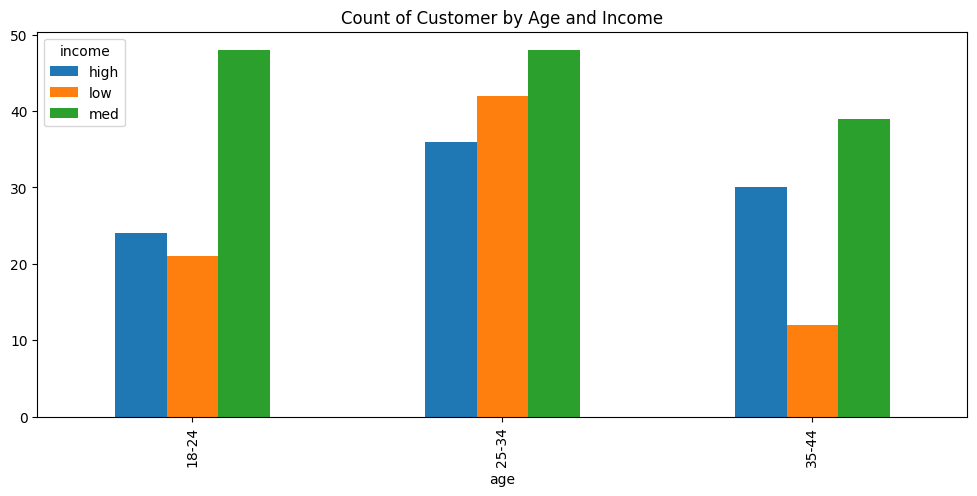

In [10]:
#| label: fig-eda-1
#| fig-cap: "Count of customer by age and income"

#Show number of observations by age bin and income
fig, ax = plt.subplots(figsize=(12,5))

df.groupby(['age', 'income']).size().unstack().plot(kind='bar', ax=ax, title='Count of Customer by Age and Income');

Our data appears to have a higher proportion of middle class income customers with approximately an even split between high and low income customers. There also seems to be more customers in the age range of 25-34 than other categories. 

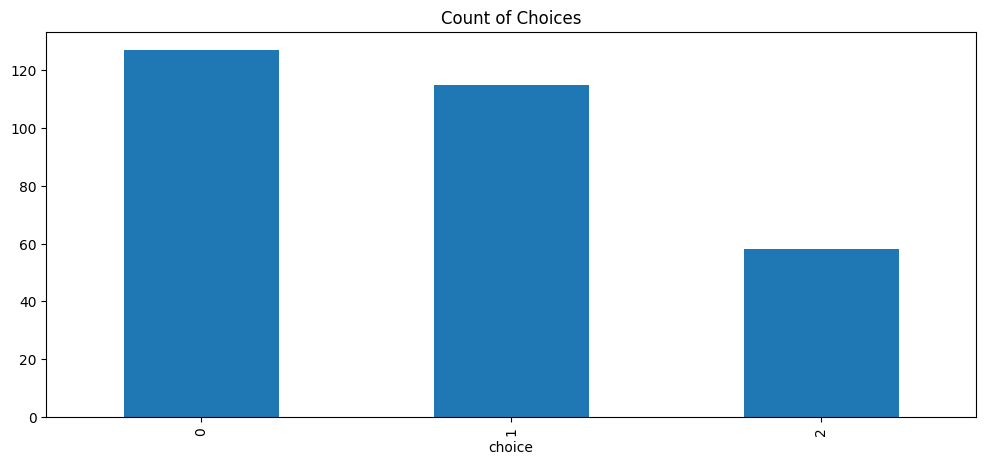

In [11]:
#| label: fig-eda-2
#| fig-cap: "Count of choices between flight 1, flight 2, or no flight"

#Show count of choices
fig, ax = plt.subplots(figsize=(12,5))

df.groupby(['choice']).size().plot(kind='bar', ax=ax, title='Count of Choices');

@fig-eda-2 shows the count of choices for flight 1 (0), flight 2 (2), or no flight (2). The graph shows that the general consumer selected flight 1 slightly more often than flight 2. 

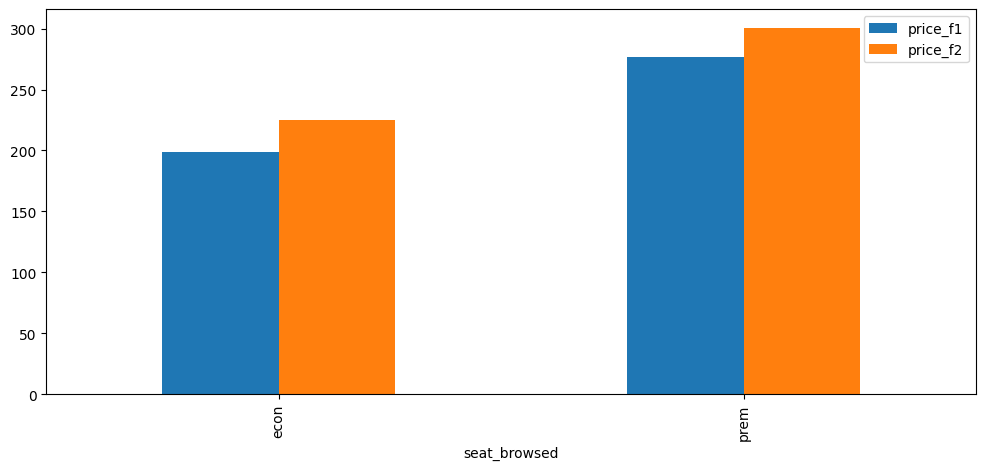

In [12]:
#| label: fig-eda-3
#| fig-cap: "Average price of seat split by class and flight number"

#Show average price of ticket between f1 and f2 in econ and prem
fig, ax = plt.subplots(figsize=(12,5))

df.groupby(['seat_browsed']).agg({'price_f1': 'mean', 'price_f2': 'mean'}).plot(kind='bar', ax=ax);

@fig-eda-3 shows the average price between flight 1 and flight 2 tickets, split by class type. Flight two in both categories had higher average ticket prices than flight 1. 

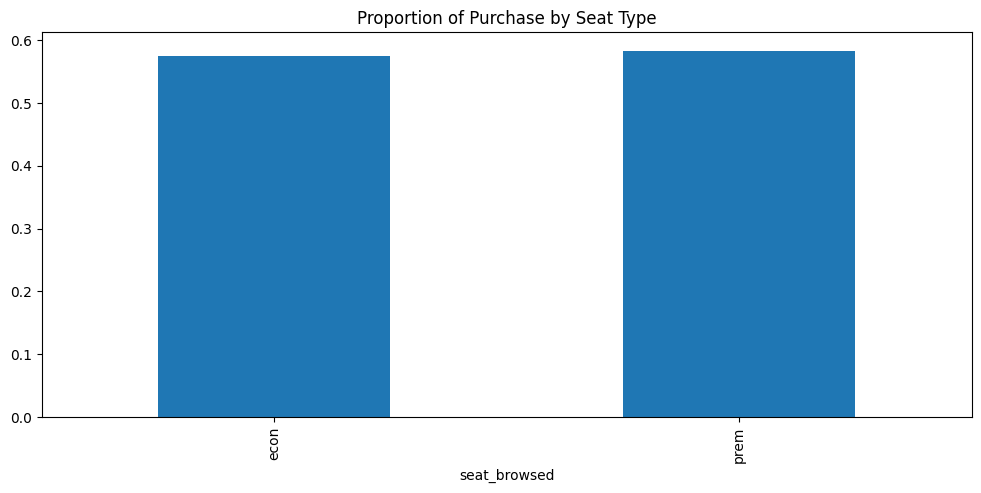

In [13]:
#| label: fig-eda-4
#| fig-cap: "Proportion of ticket purchases by seat type"

#Show econ vs prem acceptance
fig, ax = plt.subplots(figsize=(12,5))

(df.assign(bought_seat = lambda x: np.where(x['choice'] >= 1, 1, 0))
 .groupby(['seat_browsed'])
 .agg({'bought_seat': ['count', 'sum']})
 .assign(norm_values = lambda x: x[('bought_seat', 'sum')] / x[('bought_seat', 'count')])
 .reset_index()[['seat_browsed', 'norm_values']]
 .plot(kind='bar', x='seat_browsed', y='norm_values', ax=ax, title='Proportion of Purchase by Seat Type', legend=False));

@fig-eda-4 shows that both economy and premium class seats were about equally purchased, around 60% purchase rate. 

## Utility Theory

The theory for our modeling approach stems from microeconomics, namely utility theory [@bernoulli1738exposition]. As previously discussed, the primary objective for airlines is to capture as much consumer surplus as possible by accurately estimating a customer's WTP. WTP itself is derived from the principle that individuals seek to maximize their utility from the consumption of a good or service. Therefore, if an airline's service provides a consumer with utility, the goal is to set a price that is optimally aligned with the value of that utility, thereby maximizing the revenue captured.

In our simulation, given the discrete consumer choice between alternatives, we use the random utility model [@mcfadden1974conditional], as shown in @eq-rum-1.

$$
U_{ijt} = V_{ijt} + \epsilon_{ijt}
$$
$$
\epsilon_{ijt} \overset{i.i.d.}{\sim} \text{Gumbel}(0,1)
$${#eq-rum-1}

$U_{ijt}$ is the utility derived by the $i$th customer choosing the $j$th alternative in the $t$th scenario. This utility is composed of a deterministic portion $V_{ijt}$ (our "observed" utility from purchased ticket data) and a stochastic term $\epsilon_{ijt}$ that we assume follows a Gumbel distribution. 

While we don't observe an exact "utility" estimate in this data (or in any data for that matter), we postulate that utility is derived as a linear combination of observed features. This is illustrated in @eq-rum-2.

$$
V_{ijt} = \text{ASC}_{flight1,i,t} I(\text{Flight 1}) + \text{ASC}_{flight2,i,t} I(\text{Flight 2}) + \beta_{i,price,t} Price_{jt} + \beta_{i,stops,t} Stops_{jt} + \beta_{i,seat,t} Seat_{jt}
$${#eq-rum-2}

The equation @eq-rum-2 illustrates that the observed utility, $V_{ijt}$, is a function of several key attributes of both the alternatives and the customer. Specifically, the utility is dependent on the flight's price, the number of stops, and the type of seat purchased.

The utility we derive in @eq-rum-2 is then used to calculate the probability of choosing a given alternative in a given scenario. This is illustrated in @eq-rum-3.

$$
P(Y_{ijt} = 1) = \frac{exp(V_{ijt})}{\sum_{z=1}^{J}exp(V_{izt})}
$${#eq-rum-3}

Essentially, we assume that the probability of a consumer's observed choice is a function of the utility of a given alternative ($V_{ijt}) relative to the utilities of all other available alternatives.

## Hierarchical Bayesian

As mentioned at the outset of this section, we are modeling this scenario hierarchically. This approach is based on the belief that individuals derive their preferences from a "global" distribution, which is then adjusted based on personal differences. To implement this, we model each $\beta$ value as a draw from a global population distribution, as shown in @eq-bay-1.

$$
\beta_{it} = \begin{pmatrix} \text{ASC}_{flight1,i,t} \\ \text{ASC}_{flight2,i,t} \\ \beta_{i,price,t} \\ \beta_{i,stops,t} \\ \beta_{i,seat,t} \end{pmatrix} \sim N(\mu_{t}, \Sigma)
$${#eq-bay-1}

Each customer $i$ in scenario $t$ has a vector $\beta$ that is drawn from a multivariate normal distribution with mean $\mu_{t}$ and covariance $\Sigma$. $\mu_{t}$ is our vector of population parameter estimates for the average preference for each attribute of a flight at time $t$. $\Sigma$ represents the unobserved heterogeneity around $\mu_{t}$ (Note: we hold this value constant throughout to simplify modeling). 

We model $\mu_{t}$ as an AR(1) process, as shown in @eq-bay-2.

$$
\mu_{kt} = \mu_{k,base} + \phi_{k}(\mu_{kt-1} - \mu_{k,base}) + \eta_{kt}
$${#eq-bay-2}

$\mu_{kt}$ is the average preference for attribute $k$ at time $t$. This is a linear combination of three key components: The base preference ($\mu_{k,base}$), the difference between the past average preference and the base preference scaled by autoregressive component $\phi_{k}$ (how much the past mean influences the current mean), and the random shock $\eta_{kt}$ which accounts for unobserved fluctuations in the average preference. (Note: We assume $\eta_{kt}$ is drawn from $N(0,q_{k})$. Interested readers can see the code for $q_{k}$ prior).

The $\mu_{k,base}$ parameter is estimated from the baseline population hyperparameters, as shown in @eq-bay-3.

$$
\mu_{k,base} = \alpha_{k} + \delta_{kc}
$${#eq-bay-3}

$\alpha_{k}$ is the intercept for the baseline population mean for each attribute $k$. This is then adjusted based on different customer demographics $c$ for each attribute $k$. Each $\alpha_{k}$ and $\delta_{kc}$ has prior $N(\mu, \sigma)$ (interested readers can view the numpyro code for specific numbers).

The likelihood function based on all these parameters is modeled in @eq-bay-4.

$$
L(Y|\beta, \mu, \Sigma, \phi, Q) = \prod_{i=1}^{N} \prod_{j=1}^{J} \prod_{t=1}^{T_{i}} P(Y_{ijt} = 1)
$${#eq-bay-4}

Once these parameters are estimated, we can calculate individual WTP using @eq-wtp-1.

$$
\text{WTP}_{ikt} = -\frac{\beta_{ikt}}{\beta_{i,price,t}}
$${#eq-wtp-1}

WTP is formally defined as the marginal rate of substitution between a non-monetary attribute and price. Within our logit framework, this is calculated as the ratio of an attribute's coefficient to the absolute value of the price coefficient. A positive WTP indicates the amount a customer is willing to pay to gain an attribute, while a negative WTP represents the cost a customer is willing to incur to avoid an undesirable attribute.

To model this data, we used `numpyro` [@phan2019composable] using a NUTS kernel [@hoffman2014no] and collected 1000 samples.

In [14]:
#Instantiate standard scaler
scaler = StandardScaler()

In [15]:
#Instantiate features and reponse
X = (df.drop(['choice'], axis=1)
     .pipe(lambda x: pd.get_dummies(x, columns=['income', 'age', 'seat_browsed'], dtype='int'))
     .drop(['income_low', 'seat_browsed_econ', 'age_18-24'], axis=1))
X[['price_f1', 'price_f2', 'stops_f1', 'stops_f2']] = scaler.fit_transform(X[['price_f1', 'price_f2', 'stops_f1', 'stops_f2']])
y = df['choice']

In [16]:
#Define bayes model
def hb_mixed_logit(X_vars, cust_id, scenario_id, y_vars=None):
    num_cust = 100
    num_scenario = 3
    num_params = 5
    
    alpha_f1 = numpyro.sample("alpha_f1", dist.Normal(0, 2))
    alpha_f2 = numpyro.sample("alpha_f2", dist.Normal(0, 2))
    alpha_price = numpyro.sample("alpha_price", dist.Normal(-0.02, .005))
    alpha_stop = numpyro.sample("alpha_stop", dist.Normal(-1, 1))
    alpha_seat = numpyro.sample("alpha_seat", dist.Normal(1, 1))
    
    delta_price_med = numpyro.sample("delta_price_med", dist.Normal(.002, .001))
    delta_price_high = numpyro.sample("delta_price_high", dist.Normal(.004, .001))
    delta_price_bus = numpyro.sample("delta_price_bus", dist.Normal(.006, .001))
    delta_stops_bus = numpyro.sample("delta_stops_bus", dist.Normal(-1, 1))
    delta_seat_25 = numpyro.sample("delta_seat_25", dist.Normal(1, 1))
    delta_seat_35 = numpyro.sample("delta_seat_35", dist.Normal(1.5, 1))
    delta_seat_bus = numpyro.sample("delta_seat_bus", dist.Normal(2, 1))
    
    phi_f1 = numpyro.sample("phi_f1", dist.Uniform(-1, 1))
    phi_f2 = numpyro.sample("phi_f2", dist.Uniform(-1, 1))
    phi_price = numpyro.sample("phi_price", dist.Uniform(-1, 1))
    phi_stop = numpyro.sample("phi_stop", dist.Uniform(-1, 1))
    phi_seat = numpyro.sample("phi_seat", dist.Uniform(-1, 1))
    phi_stack = jnp.stack([phi_f1, phi_f2, phi_price, phi_stop, phi_seat])
    
    q_f1 = numpyro.sample("q_f1", dist.HalfNormal(1))
    q_f2 = numpyro.sample("q_f2", dist.HalfNormal(1))
    q_price = numpyro.sample("q_price", dist.HalfNormal(1))
    q_stop = numpyro.sample("q_stop", dist.HalfNormal(1))
    q_seat = numpyro.sample("q_seat", dist.HalfNormal(1))
    q_stack = jnp.stack([q_f1, q_f2, q_price, q_stop, q_seat], axis=-1)
    
    sig_mat = jnp.diag(jnp.array([0.2, 0.2, 0.005, 0.2, 0.2]))
    
    with numpyro.plate("customer_plate", num_cust * num_scenario):
        mu_price_b = alpha_price + (X_vars[:, 6] * delta_price_med) + (X_vars[:, 5] * delta_price_high) + (X_vars[:, 0] * delta_price_bus)
        mu_stop_b = alpha_stop + (X_vars[:, 0] * delta_stops_bus)
        mu_seat_b = alpha_seat + (X_vars[:, 7] * delta_seat_25) + (X_vars[:, 8] * delta_seat_35) + (X_vars[:, 0] * delta_seat_bus)

        mu_base = jnp.stack([jnp.full(num_cust * num_scenario, alpha_f1), jnp.full(num_cust * num_scenario, alpha_f2), 
                             mu_price_b, mu_stop_b, mu_seat_b], axis=-1)
        
        q_noise_0 = numpyro.sample("q_noise_0", dist.Normal(0, q_stack.reshape(-1, 1)))
        mu_s_0 = mu_base + q_noise_0.T
        beta_s_0 = numpyro.sample("beta_s_0", dist.MultivariateNormal(mu_s_0, sig_mat))
        
        q_noise_1 = numpyro.sample("q_noise_1", dist.Normal(0, q_stack.reshape(-1,1)))
        mu_s_1 = mu_base + (phi_stack * (mu_s_0 - mu_base)) + q_noise_1.T
        beta_s_1 = numpyro.sample("beta_s_1", dist.MultivariateNormal(mu_s_1, sig_mat))
        
        q_noise_2 = numpyro.sample("q_noise_2", dist.Normal(0, q_stack.reshape(-1,1)))
        mu_s_2 = mu_base + (phi_stack * (mu_s_1 - mu_base)) + q_noise_2.T
        beta_s_2 = numpyro.sample("beta_s_2", dist.MultivariateNormal(mu_s_2, sig_mat))
        
        beta_sep = jnp.stack([beta_s_0, beta_s_1, beta_s_2], axis=1)[cust_id, scenario_id, :]
        
        beta_f1 = beta_sep[:, 0]
        beta_f2 = beta_sep[:, 1]
        beta_price = -jnp.abs(beta_sep[:, 2])
        beta_stops = -jnp.abs(beta_sep[:, 3])
        beta_seat = jnp.abs(beta_sep[:, 4])
        
        util_f1 = beta_f1 + (beta_price * X_vars[:,1]) + (beta_stops * X_vars[:,2]) + (beta_seat * X_vars[:,9])
        util_f2 = beta_f2 + (beta_price * X_vars[:,3]) + (beta_stops * X_vars[:,4]) + (beta_seat * X_vars[:,9])
        util_none = jnp.zeros_like(util_f1)
        
        all_util = jnp.stack([util_f1, util_f2, util_none], axis=-1)
        
        numpyro.sample("choice", dist.Categorical(logits=all_util), obs=y_vars)

In [17]:
# #Intialize sampler parameters
# rng_key = random.PRNGKey(0)
# kernel = NUTS(hb_mixed_logit)
# mcmc = MCMC(kernel, num_warmup=1000, num_samples=1000)

In [18]:
# #Run sampler
# mcmc.run(rng_key, jnp.array(X)[:,2:], jnp.array(X)[:,0].astype(int), jnp.array(X)[:,1].astype(int), jnp.array(y).astype(int))

In [19]:
# #Save mcmc
# with open('mcmc_wtp.pkl', 'wb') as file:
#     pickle.dump(mcmc, file)
#     file.close()

In [20]:
#Open mcmc
with open('mcmc_wtp.pkl', 'rb') as file:
    mcmc_wtp = pickle.load(file)
    file.close()

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [21]:
#Get betas for each scenario
beta_s_0 = mcmc_wtp.get_samples()['beta_s_0']
beta_s_1 = mcmc_wtp.get_samples()['beta_s_1']
beta_s_2 = mcmc_wtp.get_samples()['beta_s_2']

In [22]:
#Calculate WTP for stops
wtp_stop_0 = -(-np.abs(beta_s_0[:,:,3]) / -np.abs(beta_s_0[:,:,2]))
wtp_stop_1 = -(-np.abs(beta_s_1[:,:,3]) / -np.abs(beta_s_1[:,:,2]))
wtp_stop_2 = -(-np.abs(beta_s_2[:,:,3]) / -np.abs(beta_s_2[:,:,2]))

In [23]:
#Clip WTP for stops
wtp_stop_0 = np.clip(wtp_stop_0, -60, 0)
wtp_stop_1 = np.clip(wtp_stop_1, -60, 0)
wtp_stop_2 = np.clip(wtp_stop_2, -60, 0)

In [24]:
#Calculate WTP for seat
wtp_seat_0 = -(np.abs(beta_s_0[:,:,4]) / -np.abs(beta_s_0[:,:,2]))
wtp_seat_1 = -(np.abs(beta_s_1[:,:,4]) / -np.abs(beta_s_0[:,:,2]))
wtp_seat_2 = -(np.abs(beta_s_2[:,:,4]) / -np.abs(beta_s_0[:,:,2]))

In [25]:
#Clip WTP for seat
wtp_seat_0 = np.clip(wtp_seat_0, 0, 60)
wtp_seat_1 = np.clip(wtp_seat_1, 0, 60)
wtp_seat_2 = np.clip(wtp_seat_2, 0, 60)

## Results

In the context of airline pricing, we'd like to understand the WTP for customers avoiding layovers (stops) on their flights and the WTP for customers seeking a premium class seat. If we can identify different WTP for each customer, we can better personalize pricing based on these attributes to capture more revenue per customer. 

To illustrate the results of our model, we present the average WTP estimate for stops along with 95% credible interval for customer 5. These results are shown below for each scenario $t$.

In [26]:
#Show WTP for stops for single customer (scen 0)
cust_id = 5
print(f"Average WTP stop for customer {cust_id}: {np.mean(wtp_stop_0, axis=0)[cust_id]}")
print(f"95% CI for customer {cust_id}: {np.percentile(wtp_stop_0, q=[2.5, 97.5], axis=0)[:,cust_id]}")

Average WTP stop for customer 5: -11.361211776733398
95% CI for customer 5: [-60.          -0.18702286]


In [27]:
#Show WTP for stops for single customer (scen 1)
cust_id = 5
print(f"Average WTP stop for customer {cust_id}: {np.mean(wtp_stop_1, axis=0)[cust_id]}")
print(f"95% CI for customer {cust_id}: {np.percentile(wtp_stop_1, q=[2.5, 97.5], axis=0)[:,cust_id]}")

Average WTP stop for customer 5: -10.813233375549316
95% CI for customer 5: [-60.         -0.1928775]


In [28]:
#Show WTP for stops for single customer (scen 2)
cust_id = 5
print(f"Average WTP stop for customer {cust_id}: {np.mean(wtp_stop_2, axis=0)[cust_id]}")
print(f"95% CI for customer {cust_id}: {np.percentile(wtp_stop_2, q=[2.5, 97.5], axis=0)[:,cust_id]}")

Average WTP stop for customer 5: -10.883264541625977
95% CI for customer 5: [-60.          -0.17119325]


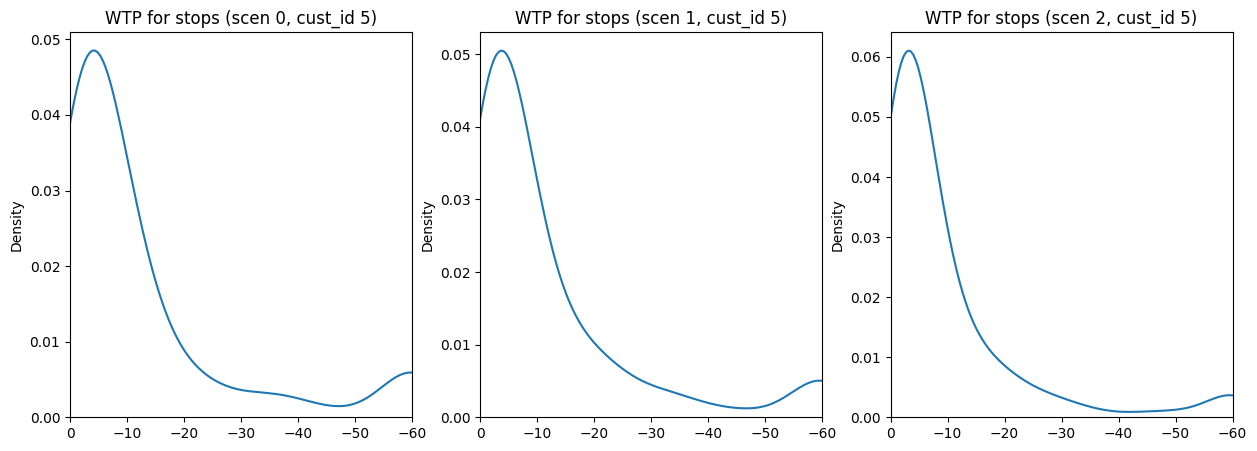

In [29]:
#| label: fig-wtp-1
#| fig-cap: "Posterior distributions for WTP on stops across different scenarios"

#Show posterior density for each scenario
fig, ax = plt.subplots(1,3, figsize=(15,5))
wtp_stop_lst = [wtp_stop_0, wtp_stop_1, wtp_stop_2]

for i, a in enumerate(ax.flatten()):
    sns.kdeplot(wtp_stop_lst[i][cust_id], ax=a)
    a.set_title(f"WTP for stops (scen {i}, cust_id {cust_id})")
    a.set_xlim(left=0, right=-60)

In [30]:
df.query("cust_id == 5")

,cust_id,scen_id,age,income,is_business,seat_browsed,price_f1,stops_f1,price_f2,stops_f2,choice
15,5,0,18-24,med,0,econ,207.0,1,237.0,1,1
16,5,1,18-24,med,0,prem,323.0,0,328.0,0,0
17,5,2,18-24,med,0,econ,180.0,2,228.0,0,1


Customer 5, an individual aged 18-24 with a middle income who is not a business traveler, shows a WTP of approximately \$11 to avoid one additional stop. This is the marginal value that customer 5 would be willing to add to the ticket, on average, to avoid an additional stop on their flight. If we were to set prices at the customer level, we could use this information to set a price below this ceiling amount to better capture the additional consumer surplus.

We also can view customer 5's WTP for seat upgradge (going up from economy to premium). These results are shown below.

In [33]:
#Show WTP for seat for single customer
cust_id = 5
print(f"Average WTP seat for customer {cust_id}: {np.mean(wtp_seat_0, axis=0)[cust_id]}")
print(f"95% CI for customer {cust_id}: {np.percentile(wtp_seat_0, q=[2.5, 97.5], axis=0)[:,cust_id]}")

Average WTP seat for customer 5: 26.012453079223633
95% CI for customer 5: [ 0.8786044 60.       ]


In [34]:
cust_id = 5
print(f"Average WTP seat for customer {cust_id}: {np.mean(wtp_seat_1, axis=0)[cust_id]}")
print(f"95% CI for customer {cust_id}: {np.percentile(wtp_seat_1, q=[2.5, 97.5], axis=0)[:,cust_id]}")

Average WTP seat for customer 5: 26.450408935546875
95% CI for customer 5: [ 0.83505126 60.        ]


In [35]:
ust_id = 5
print(f"Average WTP seat for customer {cust_id}: {np.mean(wtp_seat_2, axis=0)[cust_id]}")
print(f"95% CI for customer {cust_id}: {np.percentile(wtp_seat_2, q=[2.5, 97.5], axis=0)[:,cust_id]}")

Average WTP seat for customer 5: 26.11977767944336
95% CI for customer 5: [ 1.03312797 60.        ]


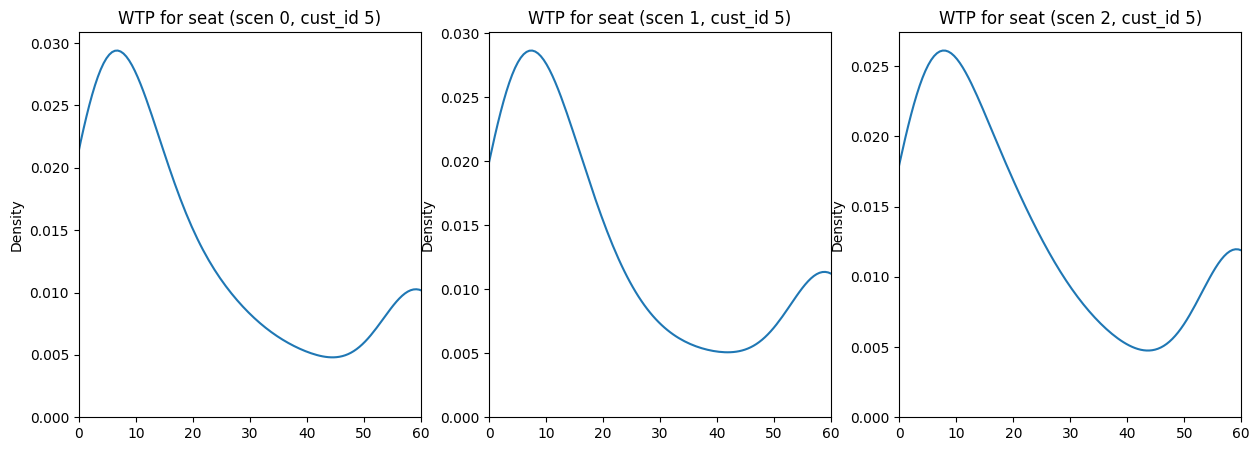

In [36]:
#| label: fig-wtp-2
#| fig-cap: "Posterior distribution for WTP on seat upgrade across different scenarios"

#Show posterior density for each scenario
fig, ax = plt.subplots(1,3, figsize=(15,5))
wtp_seat_lst = [wtp_seat_0, wtp_seat_1, wtp_seat_2]

for i, a in enumerate(ax.flatten()):
    sns.kdeplot(wtp_seat_lst[i][cust_id], ax=a)
    a.set_title(f"WTP for seat (scen {i}, cust_id {cust_id})")
    a.set_xlim(left=0, right=60)

The posterior distributions for seat upgrades are more spread out, indicating a higher degree of uncertainty in our estimates compared to those for stops. Similar to the distributions in @fig-wtp-1, these posterior distributions do not vary significantly across each scenario. It is worth noting that the mean WTP for seat upgrades is higher for Customer 5, reflecting a greater potential value, though this estimate comes with higher uncertainty due to the wider distribution. This uncertainty can be incorporated directly into our pricing strategy to create a more robust offering system.

## Price Offer Strategy

Our goal is to maximize the expected profit from a given price point for a particular customer. While we could set the price as the base fare plus the mean of the posterior distribution, a more optimal approach would be finding a price point $p$ that would maximize @eq-profit-1. 

$$
E[p-c] = (p-c)P(WTP_{ikt} > p)
$${#eq-profit-1}

$p$ is the price and $c$ is the cost associated with the flight. The probabilities from @eq-profit-1 can be pulled from our posterior distributions.

Assuming a cost $c$ of \$200 and a base fare $p$ of \$200, we determine the optimal price for a flight based on the WTP for avoiding a stop. To do this, we test integer price points ranging from \$5 to \$30 above the base fare. Using the posterior distribution derived from scenario 2 for customer 5, the resulting optimal price is shown below.

In [41]:
#Find max price point
prices_lst = np.arange(5, 30, 1)
exp_profit = []
for i in prices_lst:
    res = i * (np.sum((wtp_stop_2[:,cust_id] * -1) > i) / wtp_stop_2.shape[0])
    exp_profit.append(res)

In [47]:
print(f"Optimal price to maximize profit: ${200 + prices_lst[np.argmax(exp_profit)]}")

Optimal price to maximize profit: $218


# Conclusion

In this post, we reviewed the history of airline revenue management, from the 1978 deregulation act to today's more sophisticated approaches. We discussed how these systems have attempted to maximize revenue by constantly adjusting prices based on market dynamics and leveraging techniques like price discrimination. We then introduced a new technological disruption with the advent of LLMs and LMMs. Following this, we presented a simpler approach using a dynamic hierarchical mixed logit model to estimate individual customer WTP. We concluded by demonstrating how these estimates can be used within a basic profit optimization framework to offer prices that maximize profitability for each customer.

Overall, we hope this post has provided a clear overview of the complexities of pricing within the airline industry. The practices currently in use are the result of a considerable amount of research and development. Now, with the revolution of AI powered by LLMs, the airline industry appears to primed for yet another pricing revolution.